In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import pickle

In [2]:
df = pd.read_csv("C:/Users/ryran/OneDrive/Desktop/CdacProject/Google-Playstore-Analysis-and-Prediction-System/sampled_file.csv")

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           200000 non-null  object 
 1   App Id             200000 non-null  object 
 2   Category           200000 non-null  object 
 3   Rating             200000 non-null  float64
 4   Rating Count       200000 non-null  float64
 5   Installs           200000 non-null  object 
 6   Minimum Installs   200000 non-null  float64
 7   Maximum Installs   200000 non-null  int64  
 8   Free               200000 non-null  bool   
 9   Price              200000 non-null  float64
 10  Currency           199999 non-null  object 
 11  Size               200000 non-null  object 
 12  Minimum Android    199459 non-null  object 
 13  Developer Id       199995 non-null  object 
 14  Developer Website  134352 non-null  object 
 15  Developer Email    199999 non-null  object 
 16  Re

(200000, 24)

In [4]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [5]:
df.isnull().sum()

App Name                 0
App Id                   0
Category                 0
Rating                   0
Rating Count             0
Installs                 0
Minimum Installs         0
Maximum Installs         0
Free                     0
Price                    0
Currency                 1
Size                     0
Minimum Android        541
Developer Id             5
Developer Website    65648
Developer Email          1
Released              4221
Last Updated             0
Content Rating           0
Privacy Policy       36121
Ad Supported             0
In App Purchases         0
Editors Choice           0
Scraped Time             0
dtype: int64

In [6]:
missing_percentage = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage

Developer Website    32.8240
Privacy Policy       18.0605
Released              2.1105
Minimum Android       0.2705
Developer Id          0.0025
Developer Email       0.0005
Currency              0.0005
Editors Choice        0.0000
In App Purchases      0.0000
Ad Supported          0.0000
Content Rating        0.0000
Last Updated          0.0000
App Name              0.0000
App Id                0.0000
Size                  0.0000
Price                 0.0000
Free                  0.0000
Maximum Installs      0.0000
Minimum Installs      0.0000
Installs              0.0000
Rating Count          0.0000
Rating                0.0000
Category              0.0000
Scraped Time          0.0000
dtype: float64

In [7]:
#Dropping unnecessary columns
df=df.drop(columns=['App Name','App Id','Price','Currency','Minimum Installs','Maximum Installs','Developer Id','Developer Website','Minimum Android','Developer Email','Released','Last Updated','Privacy Policy','Scraped Time'])

In [8]:
df['Category'].unique()

array(['Lifestyle', 'Tools', 'Education', 'Sports', 'Shopping',
       'Productivity', 'Books & Reference', 'Music & Audio',
       'Personalization', 'Finance', 'Entertainment', 'Health & Fitness',
       'Travel & Local', 'Beauty', 'Puzzle', 'Art & Design', 'Business',
       'Arcade', 'Educational', 'Maps & Navigation', 'Action',
       'Photography', 'Auto & Vehicles', 'Card', 'Communication',
       'News & Magazines', 'Food & Drink', 'Adventure', 'Social',
       'Casual', 'Events', 'Dating', 'House & Home', 'Role Playing',
       'Video Players & Editors', 'Medical', 'Word', 'Racing',
       'Simulation', 'Weather', 'Libraries & Demo', 'Strategy', 'Trivia',
       'Board', 'Casino', 'Music', 'Comics', 'Parenting'], dtype=object)

In [9]:
df['Rating'].unique()

array([0. , 4.5, 4. , 4.4, 4.3, 3.9, 4.6, 4.2, 3.2, 3.1, 4.7, 5. , 4.9,
       4.1, 3.8, 3.6, 3.4, 3.3, 3. , 4.8, 3.5, 2.7, 1.8, 3.7, 2.4, 2.2,
       2.9, 2.1, 1.9, 1.6, 2.8, 2.3, 2.6, 1.4, 1.7, 2. , 1. , 2.5, 1.5,
       1.2, 1.1, 1.3])

In [10]:
df['Content Rating'].value_counts()

Everyone           174897
Teen                17022
Mature 17+           5170
Everyone 10+         2891
Unrated                11
Adults only 18+         9
Name: Content Rating, dtype: int64

In [11]:
df['Editors Choice'].unique()

array([False,  True])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Category          200000 non-null  object 
 1   Rating            200000 non-null  float64
 2   Rating Count      200000 non-null  float64
 3   Installs          200000 non-null  object 
 4   Free              200000 non-null  bool   
 5   Size              200000 non-null  object 
 6   Content Rating    200000 non-null  object 
 7   Ad Supported      200000 non-null  bool   
 8   In App Purchases  200000 non-null  bool   
 9   Editors Choice    200000 non-null  bool   
dtypes: bool(4), float64(2), object(4)
memory usage: 9.9+ MB


In [13]:
# # Calculate counts for exact values (e.g., 1.5, 2.5, etc.)
counts = df['Rating'].value_counts()
counts_dict = counts.to_dict()

# Define a helper function to handle exact values (e.g., 1.5, 2.5, etc.)
def handle_exact_rating(rating):
    if rating in [1.5, 2.5, 3.5, 4.5]:  # Add more exact values if needed
        higher_rating = round(rating + 0.1, 1)

        higher_count = counts_dict.get(higher_rating, 0)
        rating_count = counts_dict.get(rating, 0)

        if rating < higher_count:
            return int(rating)  # Round down
        else:
            return int(rating) + 1  # Round up
    return None

# Function to transform the Rating column
def transform_rating(rating):
    if pd.isnull(rating):
        return np.nan
    
    if rating == 0:
        return 0
    elif 1 <= rating < 1.5:
        return 1
    elif 1.5 <= rating < 2.5:
        return handle_exact_rating(1.5) if rating == 1.5 else 2
    elif 2.5 <= rating < 3.5:
        return handle_exact_rating(2.5) if rating == 2.5 else 3
    elif 3.5 <= rating < 4.5:
        return handle_exact_rating(3.5) if rating == 3.5 else 4
    else:
        return 5


In [14]:
# Apply the transformation to the dataframe
df['Transformed_Rating'] = df['Rating'].apply(transform_rating)

df.drop('Rating',axis=1,inplace=True)


In [15]:
# Display the transformed dataframe
df

,Category,Rating Count,Installs,Free,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice,Transformed_Rating
0,Lifestyle,0.0,50+,True,912k,Everyone,False,False,False,0
1,Tools,0.0,500+,True,1.5M,Everyone,False,False,False,0
2,Tools,0.0,100+,False,5.6M,Everyone,True,False,False,0
3,Education,20.0,"5,000+",True,2.6M,Everyone,False,False,False,5
4,Education,5.0,500+,True,24M,Everyone,True,False,False,4
...,...,...,...,...,...,...,...,...,...,...
199995,Tools,164.0,"10,000+",True,4.7M,Everyone,True,False,False,4
199996,Communication,159.0,"5,000+",True,10M,Everyone,True,False,False,4
199997,Books & Reference,22.0,"1,000+",True,84M,Everyone,True,True,False,3
199998,Finance,7.0,"1,000+",True,4.2M,Everyone,True,False,False,4


In [16]:
# Calculate the mean 'Rating' for each 'Category'
category_means = df.groupby("Category")["Transformed_Rating"].mean()

# Fill null or blank values in the 'Rating' column with the category-wise mean
df["Transformed_Rating"] = df.apply(
    lambda row: category_means[row["Category"]] if pd.isnull(row["Transformed_Rating"]) else row["Transformed_Rating"],
    axis=1
)

In [17]:
df.isnull().sum()

Category              0
Rating Count          0
Installs              0
Free                  0
Size                  0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
Transformed_Rating    0
dtype: int64

In [18]:
df['Size'].unique()

array(['912k', '1.5M', '5.6M', ..., '605k', '645k', '833k'], dtype=object)

In [19]:
def convert_to_mb(size):
    if isinstance(size, str):
        # Remove commas from the string
        size = size.replace(',', '')

        if 'k' in size:
            # Remove 'k' and convert to MB (1 MB = 1024 KB)
            size = float(size.replace('k', '')) / 1024
        elif 'M' in size:
            # Remove 'M' (already in MB)
            size = float(size.replace('M', ''))
        elif 'G' in size:
            # Remove 'G' and convert to MB (1GB = 1024 MB)
            size = float(size.replace('G', '')) * 1024
        elif 'Varies with device' in size:
            return np.nan

    return size

In [20]:
df['Size'] = df['Size'].apply(convert_to_mb)
# Rename the column 'Size' to 'Size_in_Mb'
df.rename(columns={'Size': 'Size_in_Mb'}, inplace=True)

In [21]:
# Repeat the process for Rating
Q1 = df['Size_in_Mb'].quantile(0.25)
Q3 = df['Size_in_Mb'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Size_in_Mb'] < lower_bound) | (df['Size_in_Mb'] > upper_bound)]
print("\nOutliers in Size column:")
print(outliers)


Outliers in Size column:
                 Category  Rating Count  Installs  Free  Size_in_Mb  \
52          Music & Audio          12.0    5,000+  True        62.0   
115                Action          11.0    1,000+  True       100.0   
127          Productivity           0.0      100+  True       143.0   
158             Education           0.0      500+  True       122.0   
160         Music & Audio           0.0       50+  True        60.0   
...                   ...           ...       ...   ...         ...   
199918          Lifestyle          24.0    1,000+  True       110.0   
199920      Music & Audio         527.0  100,000+  True        82.0   
199959        Photography           0.0       10+  True        57.0   
199973             Puzzle         170.0    5,000+  True        59.0   
199997  Books & Reference          22.0    1,000+  True        84.0   

       Content Rating  Ad Supported  In App Purchases  Editors Choice  \
52           Everyone          True             

In [22]:
#Replace null values in size column with median category wise 
#As mean values is greater than median and data is +vely skewed hence replacing with median 
df['Size_in_Mb'] = df['Size_in_Mb'].fillna(df.groupby('Category')['Size_in_Mb'].transform('median').round(2))

In [23]:
df.isnull().sum()

Category              0
Rating Count          0
Installs              0
Free                  0
Size_in_Mb            0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
Transformed_Rating    0
dtype: int64

In [24]:
# Repeat the process for Rating
Q1_rating_count = df['Rating Count'].quantile(0.25)
Q3_rating_count = df['Rating Count'].quantile(0.75)
IQR = Q3_rating_count - Q1_rating_count

lower_bound = Q1_rating_count - 1.5 * IQR
upper_bound = Q3_rating_count + 1.5 * IQR
outliers = df[(df['Size_in_Mb'] < lower_bound) | (df['Size_in_Mb'] > upper_bound)]
print("\nOutliers in Size column:")
outliers


Outliers in Size column:


,Category,Rating Count,Installs,Free,Size_in_Mb,Content Rating,Ad Supported,In App Purchases,Editors Choice,Transformed_Rating
127,Productivity,0.0,100+,True,143.0,Everyone,False,False,False,0
158,Education,0.0,500+,True,122.0,Everyone,False,False,False,0
344,Health & Fitness,0.0,10+,True,149.0,Everyone,False,False,False,0
402,Video Players & Editors,0.0,100+,True,161.0,Everyone,True,False,False,0
405,Health & Fitness,0.0,5+,True,149.0,Everyone,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...
199770,Health & Fitness,0.0,1+,True,150.0,Everyone,False,False,False,0
199799,Education,0.0,1+,True,138.0,Everyone,False,False,False,0
199819,Entertainment,0.0,5+,True,130.0,Everyone,False,False,False,0
199822,Health & Fitness,23.0,"5,000+",True,155.0,Everyone,False,False,False,4


In [25]:
df['Rating Count'] = df['Rating Count'].fillna(df.groupby('Category')['Rating Count'].transform('mean').round(2))

In [26]:
df.isnull().sum()

Category              0
Rating Count          0
Installs              0
Free                  0
Size_in_Mb            0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
Transformed_Rating    0
dtype: int64

In [27]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import KFold

def k_fold_target_encoding(data, category_col, target_col, n_splits=5, smoothing=1):
    global_mean = data[target_col].mean()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    encoded_col = pd.Series(np.zeros(data.shape[0]), index=data.index)
    category_encoding_map = {}

    for train_idx, val_idx in kf.split(data):
        train_data, val_data = data.iloc[train_idx], data.iloc[val_idx]
        
        # Compute category statistics on the training fold
        category_stats = train_data.groupby(category_col)[target_col].agg(['mean', 'count'])
        category_stats['smoothed'] = (category_stats['count'] * category_stats['mean'] + 
                                      smoothing * global_mean) / (category_stats['count'] + smoothing)
        
        # Round off the smoothed values to 1 decimal place
        category_stats['smoothed'] = category_stats['smoothed'].round(1)
        
        # Store encoding map (final mean after last fold)
        category_encoding_map.update(category_stats['smoothed'].to_dict())

        # Apply encoding to validation data
        val_data_encoded = val_data[category_col].map(category_stats['smoothed']).fillna(global_mean)
        encoded_col.iloc[val_idx] = val_data_encoded

    # Save the encoding mapping as a separate .pkl file
    file_name = f"{category_col}_kfold_encoded.pkl"
    with open(file_name, "wb") as f:
        pickle.dump(category_encoding_map, f)
    
    print(f"Encoding mapping for '{category_col}' saved in '{file_name}'")

    return encoded_col

# Apply K-Fold Target Encoding and save mappings separately
df['Category'] = k_fold_target_encoding(df, category_col='Category', target_col='Transformed_Rating')
df['Content Rating'] = k_fold_target_encoding(df, category_col='Content Rating', target_col='Transformed_Rating')

# Verify the result
print(df.head())


Encoding mapping for 'Category' saved in 'Category_kfold_encoded.pkl'
Encoding mapping for 'Content Rating' saved in 'Content Rating_kfold_encoded.pkl'
   Category  Rating Count Installs   Free  Size_in_Mb  Content Rating  \
0       1.9           0.0      50+   True    0.890625             2.2   
1       2.4           0.0     500+   True    1.500000             2.2   
2       2.3           0.0     100+  False    5.600000             2.2   
3       2.3          20.0   5,000+   True    2.600000             2.2   
4       2.2           5.0     500+   True   24.000000             2.2   

   Ad Supported  In App Purchases  Editors Choice  Transformed_Rating  
0         False             False           False                   0  
1         False             False           False                   0  
2          True             False           False                   0  
3         False             False           False                   5  
4          True             False           False

In [28]:
df['Category'].unique()

array([1.9, 2.4, 2.3, 2.2, 1.8, 2. , 2.5, 2.8, 1.7, 1.4, 2.7, 1.5, 1.6,
       3.1, 2.1, 1.3, 2.6, 3.2, 3.3, 2.9, 3. , 3.4])

In [29]:
df.columns

Index(['Category', 'Rating Count', 'Installs', 'Free', 'Size_in_Mb',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Transformed_Rating'],
      dtype='object')

In [30]:
#Cleaning Installs Column(remove , and + and convert the data type from object to float)
df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','').astype('float')

C:\Users\ryran\AppData\Local\Temp\ipykernel_25284\2496173036.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','').astype('float')


In [31]:
df.shape

(200000, 10)

In [32]:
df.head()

,Category,Rating Count,Installs,Free,Size_in_Mb,Content Rating,Ad Supported,In App Purchases,Editors Choice,Transformed_Rating
0,1.9,0.0,50.0,True,0.890625,2.2,False,False,False,0
1,2.4,0.0,500.0,True,1.500000,2.2,False,False,False,0
2,2.3,0.0,100.0,False,5.600000,2.2,True,False,False,0
3,2.3,20.0,5000.0,True,2.600000,2.2,False,False,False,5
4,2.2,5.0,500.0,True,24.000000,2.2,True,False,False,4


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Category            200000 non-null  float64
 1   Rating Count        200000 non-null  float64
 2   Installs            200000 non-null  float64
 3   Free                200000 non-null  bool   
 4   Size_in_Mb          200000 non-null  float64
 5   Content Rating      200000 non-null  float64
 6   Ad Supported        200000 non-null  bool   
 7   In App Purchases    200000 non-null  bool   
 8   Editors Choice      200000 non-null  bool   
 9   Transformed_Rating  200000 non-null  int64  
dtypes: bool(4), float64(5), int64(1)
memory usage: 9.9 MB


In [34]:
df.head()

,Category,Rating Count,Installs,Free,Size_in_Mb,Content Rating,Ad Supported,In App Purchases,Editors Choice,Transformed_Rating
0,1.9,0.0,50.0,True,0.890625,2.2,False,False,False,0
1,2.4,0.0,500.0,True,1.500000,2.2,False,False,False,0
2,2.3,0.0,100.0,False,5.600000,2.2,True,False,False,0
3,2.3,20.0,5000.0,True,2.600000,2.2,False,False,False,5
4,2.2,5.0,500.0,True,24.000000,2.2,True,False,False,4


In [35]:
# boolean columns to 0 and 1
bool_cols = ['Free', 'Ad Supported', 'In App Purchases','Editors Choice']
df[bool_cols] = df[bool_cols].astype(int)

In [36]:
df.head()

,Category,Rating Count,Installs,Free,Size_in_Mb,Content Rating,Ad Supported,In App Purchases,Editors Choice,Transformed_Rating
0,1.9,0.0,50.0,1,0.890625,2.2,0,0,0,0
1,2.4,0.0,500.0,1,1.500000,2.2,0,0,0,0
2,2.3,0.0,100.0,0,5.600000,2.2,1,0,0,0
3,2.3,20.0,5000.0,1,2.600000,2.2,0,0,0,5
4,2.2,5.0,500.0,1,24.000000,2.2,1,0,0,4


In [37]:
df['Installs'] = df.groupby('Category')['Installs'].transform(lambda x: x.fillna(x.mean()))

In [38]:
df.head()

,Category,Rating Count,Installs,Free,Size_in_Mb,Content Rating,Ad Supported,In App Purchases,Editors Choice,Transformed_Rating
0,1.9,0.0,50.0,1,0.890625,2.2,0,0,0,0
1,2.4,0.0,500.0,1,1.500000,2.2,0,0,0,0
2,2.3,0.0,100.0,0,5.600000,2.2,1,0,0,0
3,2.3,20.0,5000.0,1,2.600000,2.2,0,0,0,5
4,2.2,5.0,500.0,1,24.000000,2.2,1,0,0,4


<AxesSubplot:>

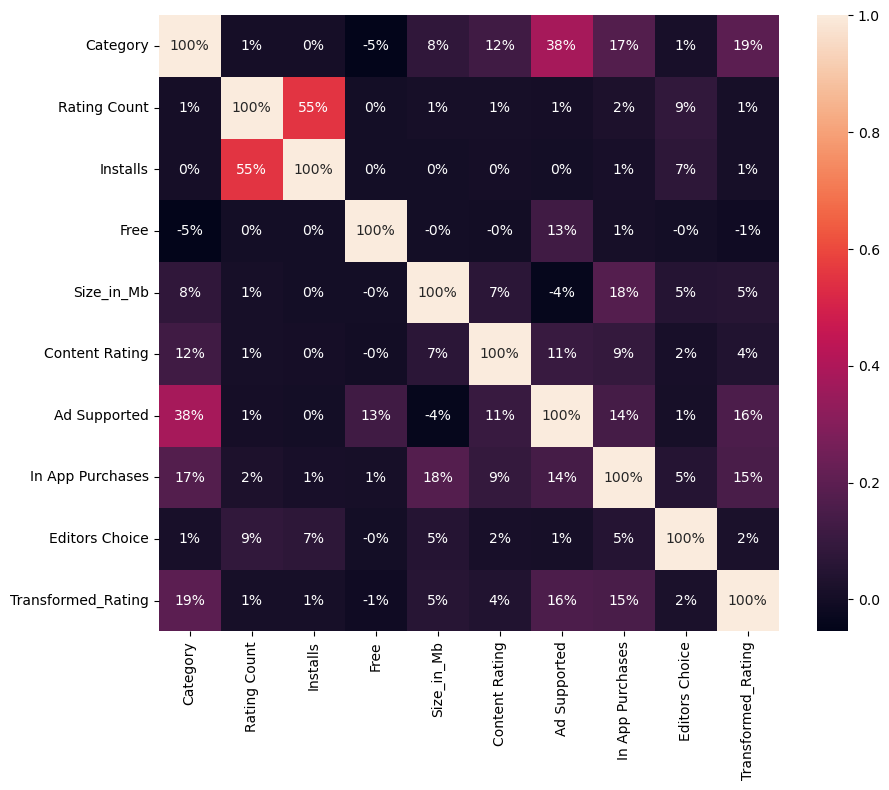

In [39]:
#Visualize the Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".0%")

In [40]:
df = df.drop(columns=['Installs','Free', 'Rating Count', 'Editors Choice'])

In [41]:
df.head()

,Category,Size_in_Mb,Content Rating,Ad Supported,In App Purchases,Transformed_Rating
0,1.9,0.890625,2.2,0,0,0
1,2.4,1.500000,2.2,0,0,0
2,2.3,5.600000,2.2,1,0,0
3,2.3,2.600000,2.2,0,0,5
4,2.2,24.000000,2.2,1,0,4


In [42]:
df.to_csv("rating_preprocessed.csv", index=False)

In [45]:
# Load CSV into Pandas
df = pd.read_csv("C:/Users/ryran/OneDrive/Desktop/CdacProject/Google-Playstore-Analysis-and-Prediction-System/rating_preprocessed.csv")

# Connect to MySQL
conn = mysql.connector.connect(host="localhost", user="root", password="Root", database="GooglePlayStore")
cursor = conn.cursor()

# Insert data row by row
for _, row in df.iterrows():
    cursor.execute("""
        INSERT INTO rating (Category, Size_in_Mb, Content_Rating, Ad_Supported, In_App_Purchases, Transformed_Rating)
        VALUES (%s, %s, %s, %s, %s, %s)
    """, tuple(row))

# Commit and close
conn.commit()
cursor.close()
conn.close()

print("CSV uploaded successfully!")

CSV uploaded successfully!
